In [1]:
# import necessary packages
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import warnings
import random

warnings.simplefilter('ignore') # filter some warning messages
%matplotlib inline


In [2]:
import numpy as np
import pandas as pd

def dt64_to_float(dt64):
    """Converts numpy.datetime64 to year as float.

    Rounded to days

    Parameters
    ----------
    dt64 : np.datetime64 or np.ndarray(dtype='datetime64[X]')
        date data

    Returns
    -------
    float or np.ndarray(dtype=float)
        Year in floating point representation
    """

    year = dt64.astype('M8[Y]')
    # print('year:', year)
    days = (dt64 - year).astype('timedelta64[D]')
    # print('days:', days)
    year_next = year + np.timedelta64(1, 'Y')
    # print('year_next:', year_next)
    days_of_year = (year_next.astype('M8[D]') - year.astype('M8[D]')
                    ).astype('timedelta64[D]')
    # print('days_of_year:', days_of_year)
    dt_float = 1970 + year.astype(float) + days / (days_of_year)
    # print('dt_float:', dt_float)
    return dt_float

if __name__ == "__main__":

    dates = np.array([
        '1970-01-01', '2014-01-01', '2020-12-31', '2019-12-31', '2010-04-28'],
        dtype='datetime64[D]')

    df = pd.DataFrame({
        'date': dates,
        'number': np.arange(5)
        })

    df['date_float'] = dt64_to_float(df['date'].to_numpy())


    dt64 = np.datetime64( "2011-11-11" )
    
#Inladen + sorteren van de dataset op regio
#Geeft het aantal unieke systemen in de verschillende regio's

data = pd.read_excel (r'FulldataEXCEL.xlsx',sheet_name = 'Above40mg')
df = pd.DataFrame(data,columns= ['FECHA DE MUESTREO','SISTEMA DE ABASTECIMIENTO','RESULTADO','PUNTO DE MUESTREO','CANTÓN'])
# display(df)
SortData = df.sort_values(by=['FECHA DE MUESTREO'], ascending=True)
# display(SortData)
#Dit hoeft niet eens, omdat er geen nul waarde in de data set zitten 
Cartago=SortData.dropna(subset=['RESULTADO'])
# display(SortData2)
Cartago.replace('ALVARADO', 'Alvarado', inplace=True)
Cartago.replace('CARTAGO', 'Cartago', inplace=True)
Cartago.replace('OREAMUNO', 'Oreamuno', inplace=True)
Cartago.replace('PARAÍSO', 'Paraíso', inplace=True)

counts = Cartago['CANTÓN'].value_counts()
display(counts)
Cartago_city = Cartago[Cartago["CANTÓN"] == 'Cartago']
Oreamuno = Cartago[Cartago["CANTÓN"] == 'Oreamuno']
Paraíso = Cartago[Cartago["CANTÓN"] == 'Paraíso']
Alvarado = Cartago[Cartago["CANTÓN"] == 'Alvarado']
El_Guarco = Cartago[Cartago["CANTÓN"] == 'El Guarco']

#In de meeste cellen staan dus meerdere waardes, die worden hier gesplits 
#en van elke value wordt een nieuwe rij gemaakt 

def splitDataFrameList(df,target_column,separator,output_type=float):
    ''' df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split
    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    def splitListToRows(row,row_accumulator,target_column,separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

Cartago      112
Oreamuno      88
Paraíso       33
Alvarado       8
El Guarco      4
CARTAGO        2
Name: CANTÓN, dtype: int64

In [3]:
#In deze cel worden de volgende handelingen uitgevoerd: Creeëren van een nieuwe
#excel, het sorteren van de dataset op 'Resultaten van hoog --> laag', 
#de datums, resultaten en syteem namen worden geextract


El_Guarco.to_excel('El_Guarco.xlsx')
El_Guarco2 = pd.read_excel (r'El_Guarco.xlsx',index_col=1,parse_dates=True )
El_Guarco3 = pd.DataFrame(El_Guarco2,columns= ['SISTEMA DE ABASTECIMIENTO','RESULTADO','CANTÓN','PUNTO DE MUESTREO'])
# Cartago_city3.sort_values(by=['RESULTADO'],ascending=False, inplace=True)
#Tijd
dates_input = El_Guarco3.index.values.astype('datetime64[D]')
Time = dt64_to_float(dates_input)
Time_rounded = np.round(Time,3)
# #Resultaten
Resultado = El_Guarco3['RESULTADO']
# #Systeem namen, deze zijn echter niet allen uniek --> 

Locaties = El_Guarco3['PUNTO DE MUESTREO']

# #Daarom wordt deze functies gecreert die alleen systemen met een unieke naam 
# #eruit filteren en samenvoegen in een array

Systema = El_Guarco3['SISTEMA DE ABASTECIMIENTO']
print(len(Systema))
def VulFunc(Naam_Array,Naam_Array_leeg):
    k =1
    for j in range(len(Naam_Array_leeg)+1):
        if j+1 == (len(Naam_Array_leeg)+1)and k==1:
            Naam_Array_leeg.append(Naam_Array)

        else:
#             print('door')
            for i in range(len(Naam_Array_leeg)):
                if Naam_Array != Naam_Array_leeg[i]:
                    continue
                else:
                    k = 2 
    return Naam_Array_leeg

# display(Cartago_city3.head(112))

4


In [4]:
#Hier wordt de lege array opgevuld met de unieke systeem namen
El_Guarco3.replace('PARAÍSOCENTRO', 'PARAÍSO DE CARTAGO: CENTRO', inplace=True)
El_Guarco3.replace('PARAÍSO CENTRO', 'PARAÍSO DE CARTAGO: CENTRO', inplace=True)
El_Guarco3.replace('PARAISO DE CARTAGO: CENTRO', 'PARAÍSO DE CARTAGO: CENTRO', inplace=True)
display(El_Guarco3)
systema_unique = []
for i in range(len(El_Guarco3['SISTEMA DE ABASTECIMIENTO'])):
    VulFunc(El_Guarco3['SISTEMA DE ABASTECIMIENTO'][i],systema_unique)
print(systema_unique)
print(len(systema_unique))


,SISTEMA DE ABASTECIMIENTO,RESULTADO,CANTÓN,PUNTO DE MUESTREO
FECHA DE MUESTREO,,,,
2014-12-03,TEJAR DE EL GUARCO: SECTOR POZO LA ROSITA,75.59,El Guarco,POZO LA ROSITA
2015-06-25,P.T.A.R. URBANIZACIÓN JARDINES DE TOBOSÍ,45.00,El Guarco,SALIDA DEL SISTEMA VERTEDRO
2015-09-25,"MEZCLA DE POZOS SILOS1,2 Y 3 DE TEJAR",41.18,El Guarco,POZO SILO 2
2016-04-19,"MEZCLA DE POZOS SILOS1,2 Y 3 DE TEJAR",44.38,El Guarco,POZO SILO 2


['TEJAR DE EL GUARCO: SECTOR POZO LA ROSITA', 'P.T.A.R. URBANIZACIÓN JARDINES DE TOBOSÍ', 'MEZCLA DE POZOS SILOS1,2 Y 3 DE TEJAR']
3


In [5]:
#in deze functie worden de drie elementen gecombineerd: Tijd, Resultaen en 
#systemen. Aleen de systemen waarbij de waarde boven de 50 uitkomt zal worden
#geplot. De output is een grafiek met twee threshold values + dataplotten over
#tijd en de hoeveelheid data punten aangegeven door de individuele 
#markeerpunten. Daarnaast worden de probleem gevallen nitraat hoeveelheden > 50, 
#opgeslagen in de array: 'Problems'
def Sub_systemen(nummer):
    SAN_RAFAEL_DE_OREAMUNO_CENTRO = np.zeros(251)
    SAN_RAFAEL_DE_OREAMUNO_CENTRO_TIME = np.zeros(251)
#     SAN_RAFAEL_DE_OREAMUNO_CENTRO_lOCATION = np.zeros(251)
    for i in range(4):
        if Systema[i]== systema_unique[nummer]:
                SAN_RAFAEL_DE_OREAMUNO_CENTRO[i] = Resultado[i]
                SAN_RAFAEL_DE_OREAMUNO_CENTRO_TIME[i] = Time_rounded[i]
#                 SAN_RAFAEL_DE_OREAMUNO_lOCATION[i] = Locaties[i]
    #             print('ja') 

    a = SAN_RAFAEL_DE_OREAMUNO_CENTRO
    a0 = a[a != 0]
    b = SAN_RAFAEL_DE_OREAMUNO_CENTRO_TIME
    b0 = b[b != 0]
#     c = SAN_RAFAEL_DE_OREAMUNO_CENTRO_LOCATION
#     c0 = c[c != 0]
    
    
    m = 1 
    for i in range(len(a0)):
        if a0[i] > 40:
            plt.title(f'{systema_unique[nummer]}', color = 'red')
#             Problems.append(f'{systema_unique[nummer]}')
            plt.ylabel('Nitrate in mg/l')
#             axs[i,j].plot(b0,a0,marker='o', markerfacecolor='blue', markersize=12)
            plt.plot(b0,a0,marker='o', markerfacecolor='blue', markersize=12)
            plt.axhline(40, color = 'yellow')
            plt.axhline(50, color = 'red')
            plt.xticks(rotation=90)
            plt.xlim([2009, 2022])
            plt.title(f'{systema_unique[nummer]}',fontsize = 13)
            m = 2 
            break
    return  plt.plot(b0,a0,marker='o', markerfacecolor='blue', markersize=12);
#, a0, b0, Problems

In [6]:
#Deze functie wordt gebruikt om onderscheidt te maken tussen de subplots die 
#wel >50 en niet <50 geplot moeten worden, door een m = 1 of m = 2 toe te wijzen. 
def Sub_systemen_m(nummer):
    SAN_RAFAEL_DE_OREAMUNO_CENTRO = np.zeros(251)
    SAN_RAFAEL_DE_OREAMUNO_CENTRO_TIME = np.zeros(251)
#     SAN_RAFAEL_DE_OREAMUNO_CENTRO_LOCATION = np.zeros(251)
    for i in range(4):
        if Systema[i]== systema_unique[nummer]:
                SAN_RAFAEL_DE_OREAMUNO_CENTRO[i] = Resultado[i]
                SAN_RAFAEL_DE_OREAMUNO_CENTRO_TIME[i] = Time_rounded[i]
#                 SAN_RAFAEL_DE_OREAMUNO_CENTRO_LOCATION[i] = Locaties[i]
    #             print('ja') 

    a = SAN_RAFAEL_DE_OREAMUNO_CENTRO
    a0 = a[a != 0]
    b = SAN_RAFAEL_DE_OREAMUNO_CENTRO_TIME
    b0 = b[b != 0]
#     c = SAN_RAFAEL_DE_OREAMUNO_CENTRO_LOCATION
#     c0 = c[c != 0]
    
    m = 1 
    for i in range(len(a0)):
        if a0[i] > 40:
            m = 2 
            break
    return  m



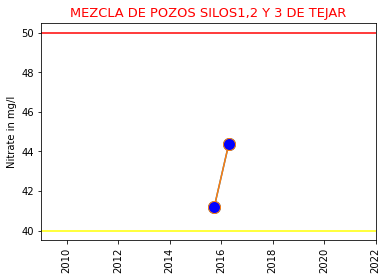

In [7]:
print(Sub_systemen(2))

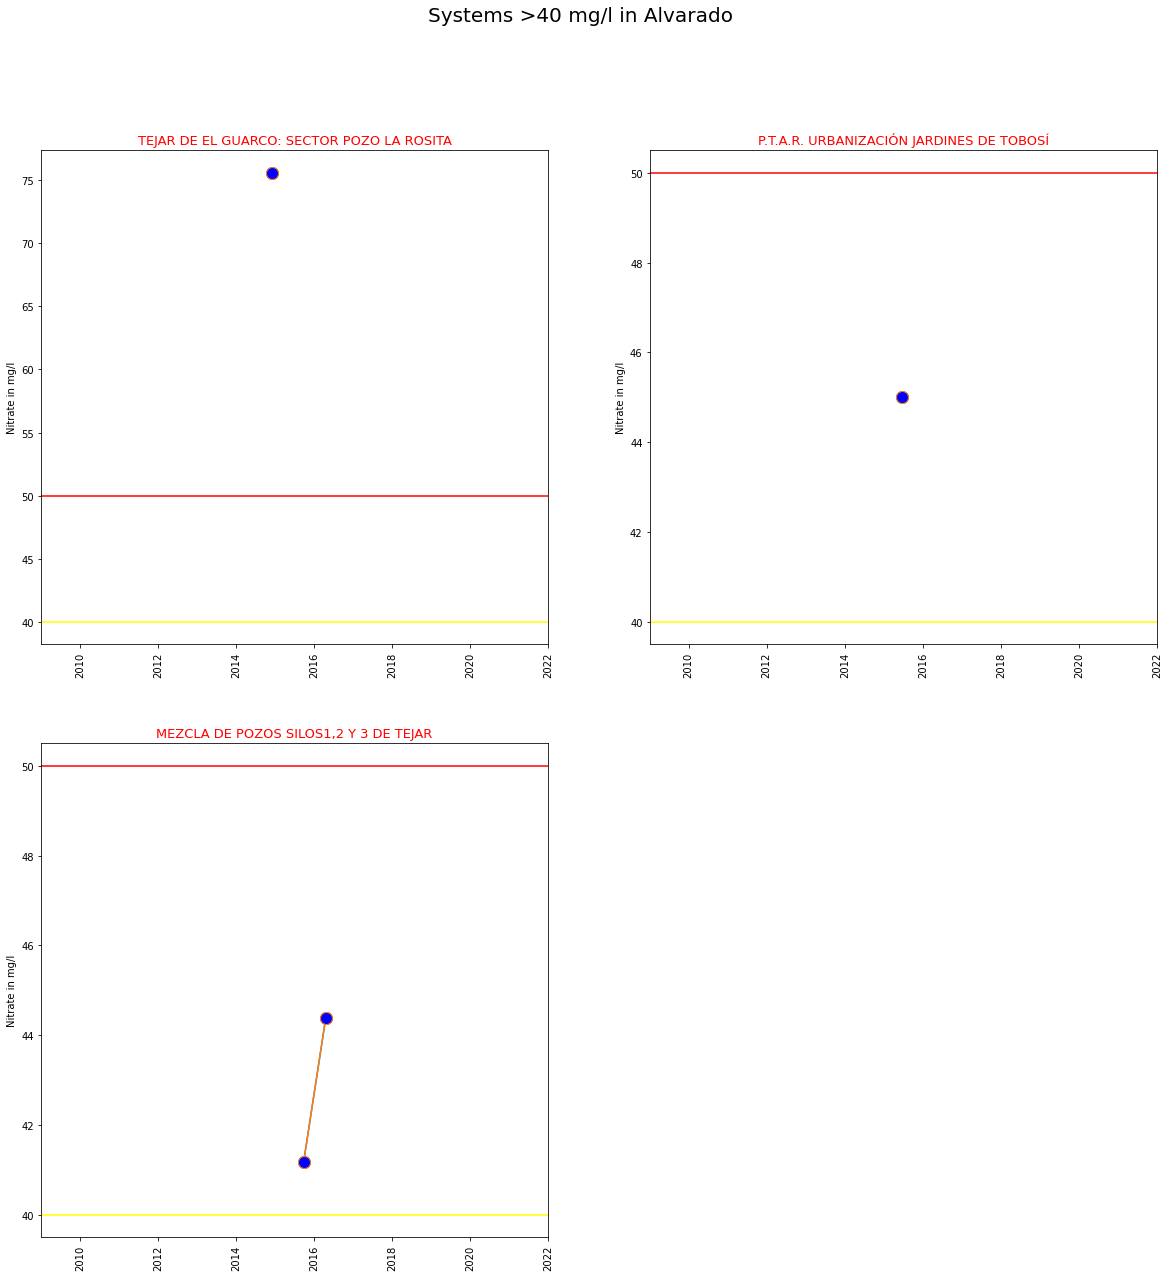

In [8]:
fig = plt.figure(figsize=(20,20));
for i in range(3):
    if Sub_systemen_m(i) == 2:
        plt.subplot(2,2,i+1);
#         #Sub_systemen(i);
        print(Sub_systemen(i))
# print(Problems)  
fig.suptitle('Systems >40 mg/l in Alvarado',fontsize = 20 ) 
fig.savefig('First_9_El_Guarco_timeline')